In [8]:
from ifrappy.granule_proteins import generate_glycogenase_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from ifrappy.plot_library import swarmy_boxes, bar_graphs, perform_statistical_test, overlay_recovery_curves

In [9]:
glyco_data = generate_glycogenase_data(generate_freshly=False)

In [10]:
selt = ['Control 10hpf',  'Granulito wo RNA 10hpf']
dat_dict = {}
for k,v in glyco_data.per_experiment_values('tau slow').items():
    if k in selt:
        dat_dict.update({k:v.to_list()})
perform_statistical_test(dat_dict, True, True)

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(0.15304188415882009,
 'ns',
 {'Homogeneity of Variance': True,
  'Normal Distribution': [False, False],
  'Parametric': False,
  'Independant Sets': True,
  'Outliers': 'Not yet implemented',
  'Performed test': 'Mann-Whitney-U',
  'P-value': 0.15304188415882009,
  'Star significance': 'ns'})

In [11]:
glyco_data.dict_experiments

{'Control 10hpf': ['Control',
  10,
 'Glycogenase OEx 10hpf': ['Glycogenase OEx',
  10,
 'Granulito wo RNA 10hpf': ['Granulito wo RNA',
  10,
  <ifrappy.main_iFRAP.ExperimentGroup at 0x29751c970>]}

In [12]:
# selection = ['Control 10hpf', 'Glycogenase OEx 10hpf', 'Granulito wo RNA 10hpf']
# plt.style.use('ggplot')
# clrs = ["#698c86", "#366b81", "#ffc28a"]
# fig, ax = plt.subplots(1,2, figsize=(10,5))
# swarmy_boxes(ax[0], glyco_data.per_experiment_values('tau slow', triagery=selection), colors=clrs)
# ax[0].set_ylabel(r'Recovery time constant $\tau$ (in sec)')
# ax[0].set_ylim(0, 100)
# bar_graphs(ax[1],glyco_data,selection , 'tau slow', colors=clrs)
# plt.savefig('/Volumes/HELHEIM/analyzed_data/diffusivity/glycogen_overexpression/Graph.pdf')
# plt.show()

In [13]:
s = 'Some protein1'
s = s[:s.rfind('#')] if '#' in s else s
print(s)

Some protein1


/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:#22262a'` for same effect.
  warnings.warn(msg, FutureWarning)


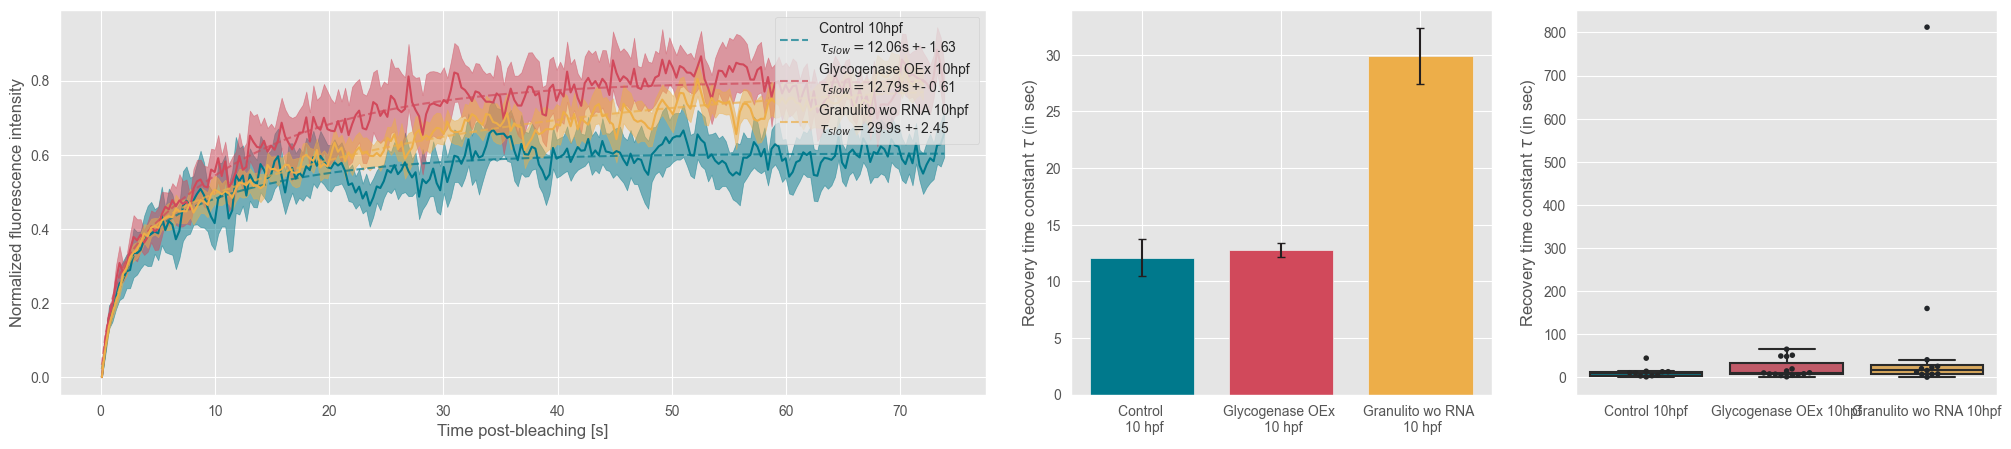

In [14]:
selection = ['Control 10hpf', 'Glycogenase OEx 10hpf', 'Granulito wo RNA 10hpf']
plt.style.use('ggplot')
clrs = ["#00798c", "#d1495b", "#edae49"] # full color palatte under https://coolors.co/palette/edae49-d1495b-00798c-30638e-003d5b
fig= plt.figure(figsize=(25,5)) #figsize=(20,5)
gs = fig.add_gridspec(1,4)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
swarmy_boxes(ax3, glyco_data.per_experiment_values('tau slow', triagery=selection), colors=clrs)
ax3.set_ylabel(r'Recovery time constant $\tau$ (in sec)')
# ax3.set_ylim(0, 500)
bar_graphs(ax2,glyco_data,selection , 'tau slow', color_palette=clrs)
overlay_recovery_curves(ax1, glyco_data, selection, colors=clrs, protein_colors=False)
plt.savefig('/Volumes/HELHEIM/analyzed_data/diffusivity/glycogen_overexpression/Overlays_graph.pdf')
plt.show()